In [1]:
from pydataset import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from acquire import get_titanic_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report

In [2]:
def train_val_test(df, strat, seed = 123):
    train, val_test = train_test_split(df, train_size = 0.8, random_state = seed, stratify = df[strat])
    val, test = train_test_split(val_test, train_size = 0.5, random_state = seed, stratify = val_test[strat])
    return train, val, test

In [3]:
df = get_titanic_data('titanic_db')
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [4]:
train, validate, test = train_val_test(df, 'survived')

In [5]:
train.survived.value_counts()

survived
0    439
1    273
Name: count, dtype: int64

In [6]:
# What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a 
# classification problem is predicting the most prevelant class in the training dataset (the mode). 
# When you make those predictions, what is your accuracy? This is your baseline accuracy.
train['baseline_prediction'] = 0
baseline_accuracy = (train.baseline_prediction == train.survived).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')



baseline accuracy: 61.66%


In [7]:
from sklearn.tree import\
DecisionTreeClassifier as DT,\
plot_tree,\
export_text

In [8]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline_prediction
222,222,0,3,male,51.0,0,0,8.0500,S,Third,None,Southampton,1,0
610,610,0,3,female,39.0,1,5,31.2750,S,Third,None,Southampton,0,0
249,249,0,2,male,54.0,1,0,26.0000,S,Second,None,Southampton,0,0
814,814,0,3,male,30.5,0,0,8.0500,S,Third,None,Southampton,1,0
118,118,0,1,male,24.0,0,1,247.5208,C,First,B,Cherbourg,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,0,3,male,40.0,1,4,27.9000,S,Third,None,Southampton,0,0
316,316,1,2,female,24.0,1,0,26.0000,S,Second,None,Southampton,0,0
245,245,0,1,male,44.0,2,0,90.0000,Q,First,C,Queenstown,0,0
768,768,0,3,male,NaN,1,0,24.1500,Q,Third,None,Queenstown,0,0


In [9]:
train = train.drop(columns=['embark_town', 'class', 'deck', 'age'])

In [10]:
train

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,baseline_prediction
222,222,0,3,male,0,0,8.0500,S,1,0
610,610,0,3,female,1,5,31.2750,S,0,0
249,249,0,2,male,1,0,26.0000,S,0,0
814,814,0,3,male,0,0,8.0500,S,1,0
118,118,0,1,male,0,1,247.5208,C,0,0
...,...,...,...,...,...,...,...,...,...,...
360,360,0,3,male,1,4,27.9000,S,0,0
316,316,1,2,female,1,0,26.0000,S,0,0
245,245,0,1,male,2,0,90.0000,Q,0,0
768,768,0,3,male,1,0,24.1500,Q,0,0


In [11]:
# Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)
train['label'] = train.pclass == 1
clf = DT(max_depth=3)
X_train = train.drop(columns=['survived', 'label', 'sex', 'embarked', 'passenger_id', 'baseline_prediction'])
y_train = train[['label']]
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [12]:
X_train.pclass.value_counts()

pclass
3    400
1    162
2    150
Name: count, dtype: int64

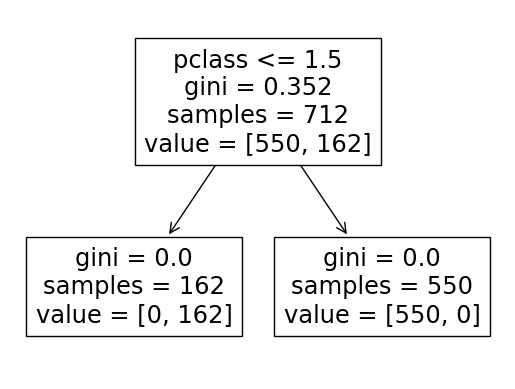

In [13]:
plot_tree(clf, feature_names= X_train.columns.to_list())
plt.show()

In [14]:
X_train

,pclass,sibsp,parch,fare,alone
222,3,0,0,8.0500,1
610,3,1,5,31.2750,0
249,2,1,0,26.0000,0
814,3,0,0,8.0500,1
118,1,0,1,247.5208,0
...,...,...,...,...,...
360,3,1,4,27.9000,0
316,2,1,0,26.0000,0
245,1,2,0,90.0000,0
768,3,1,0,24.1500,0


In [15]:
# use the thing!
model_1_preds = clf.predict(X_train)

In [16]:
# how well did this thing work?
accuracy_score(y_train, model_1_preds)

1.0

In [17]:
validate.survived.value_counts()

survived
0    55
1    34
Name: count, dtype: int64

In [18]:

validate = validate.drop(columns=['embark_town', 'class', 'deck', 'age', 'passenger_id'])

In [19]:

validate['label'] = validate.pclass == 1
X_val = validate.drop(columns=['survived', 'label', 'sex', 'embarked'])
y_val = validate.label
model_1_val_preds = clf.predict(X_val)
accuracy_score(y_val, model_1_val_preds)

1.0

In [20]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.
accuracy_score(y_val, model_1_val_preds)


1.0

In [21]:
confusion_matrix(y_val, model_1_val_preds)

array([[61,  0],
       [ 0, 28]])

In [22]:
print(classification_report(y_val, model_1_val_preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        61
        True       1.00      1.00      1.00        28

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [23]:
from env import user, host, password


In [32]:
# Work through these same exercises using the Telco dataset.

def get_telco_data(
    db,
    user=user,
    password=password,
    host=host):
    '''
    grab data will query data from a specified positional argument (string literal)
    schema from an assumed user, password, and host provided
    that they were imported from an env
    
    return: a pandas dataframe
    '''
    query = '''SELECT * FROM customers
                        LEFT JOIN contract_types
                        USING(contract_type_id)
                        LEFT JOIN internet_service_types
                        USING(internet_service_type_id)
                        LEFT JOIN payment_types 
                        USING(payment_type_id)'''
    connection = f"mysql+pymysql://{user}:{password}@{host}/{db}"
    df = pd.read_sql(query, connection)
    return df
df = get_telco_data('telco_churn')
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
payment_type_id,2,2,1,1,2,4,3,4,1,2,...,2,3,2,2,3,2,1,2,2,1
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,2,2,3,1,2,1,1,1
contract_type_id,2,1,1,1,1,1,3,3,1,3,...,1,2,2,1,1,2,1,1,3,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


In [25]:
train, validate, test = train_val_test(df, 'churn')

In [26]:
# What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a 
# classification problem is predicting the most prevelant class in the training dataset (the mode). 
# When you make those predictions, what is your accuracy? This is your baseline accuracy.
train['baseline_prediction'] = 'No'
baseline_accuracy = (train.baseline_prediction == train.churn).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')


baseline accuracy: 73.46%


In [27]:
import seaborn as sns

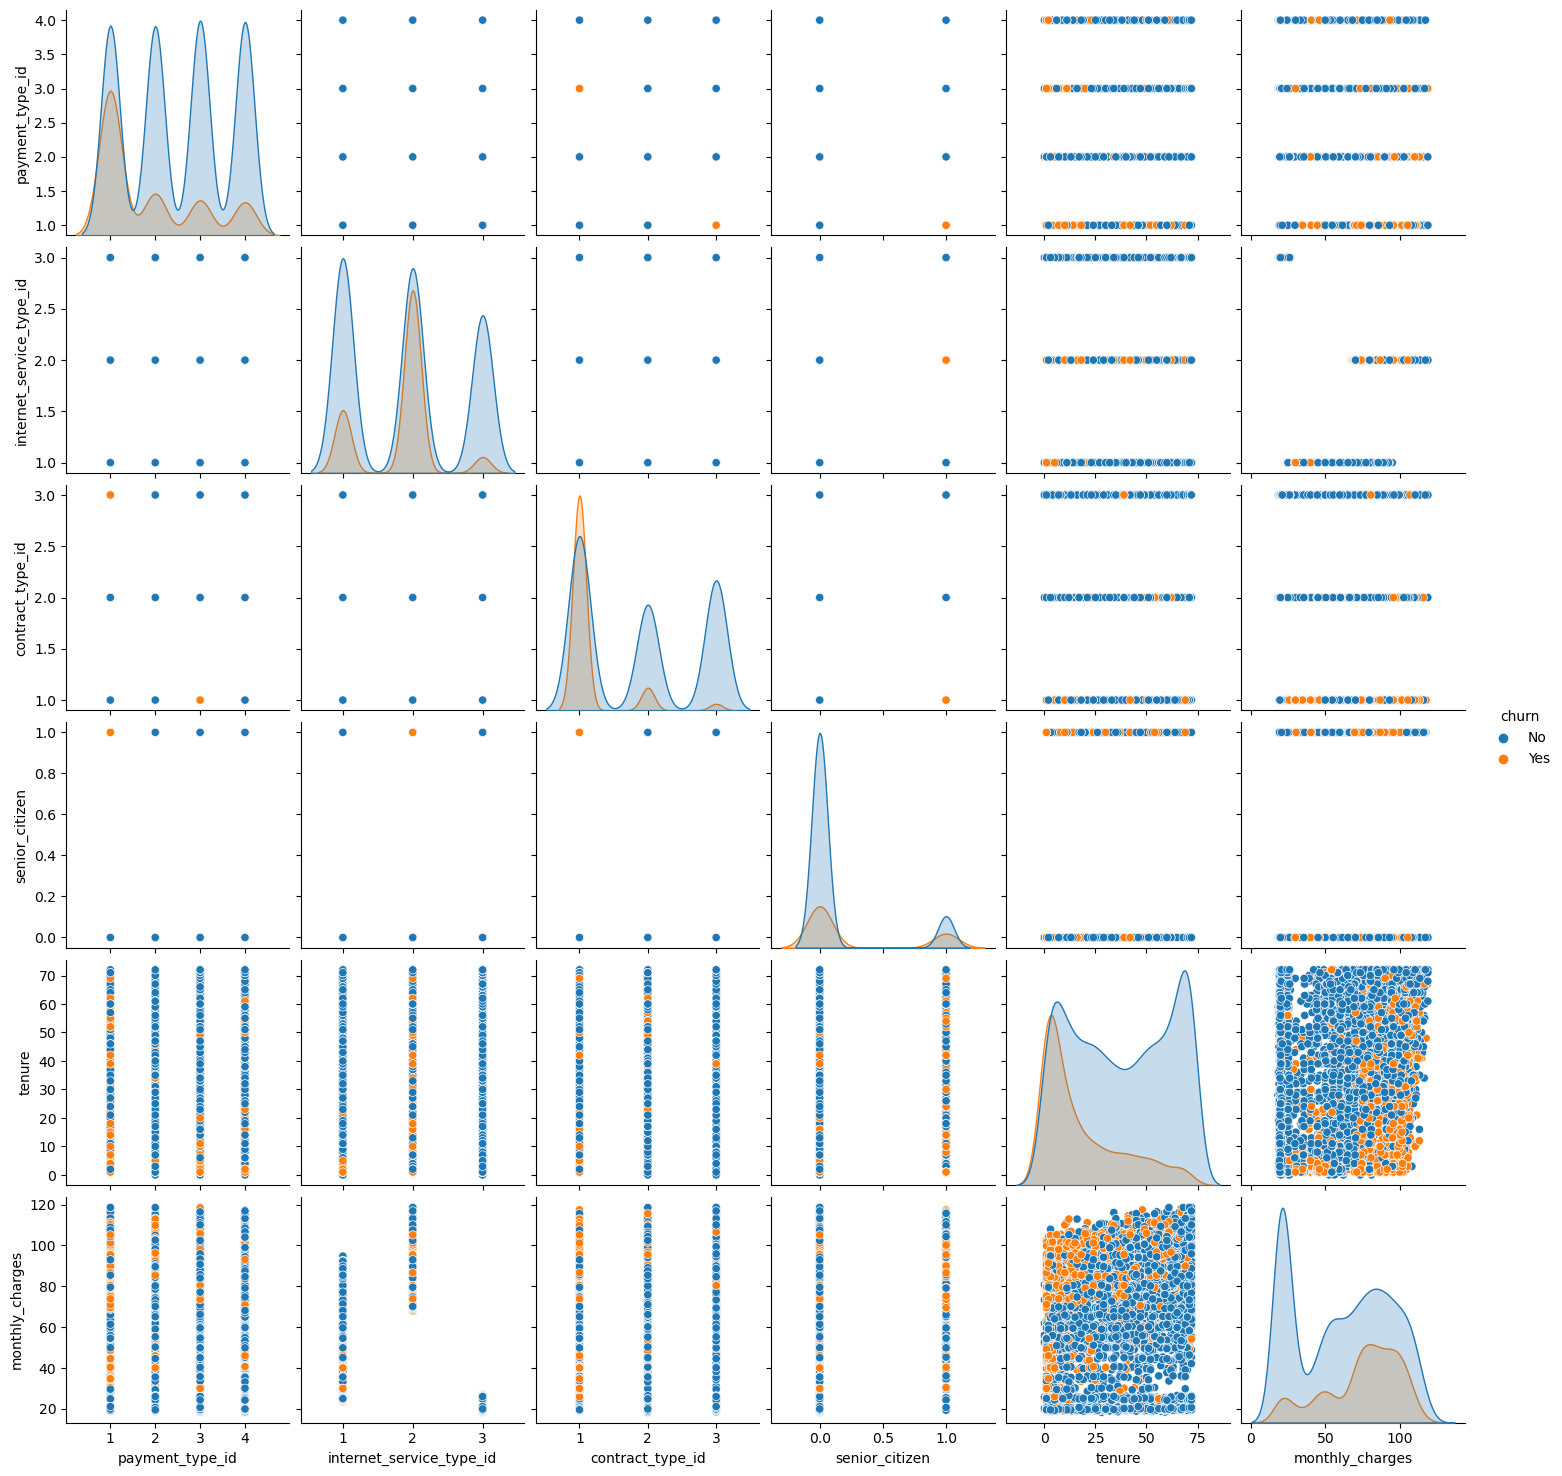

In [28]:
quan= []
for col in train:
    if ((train[col].dtype=='float64') | (train[col].dtype=='int')):
        quan.append(col)
sns.pairplot(data=train, hue='churn', vars=quan)

In [36]:
# Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)
train['label'] = train.contract_type_id == 1
clf = DT(max_depth=3)
X_train = train.drop(columns=['churn', 'label', 'multiple_lines', 'online_security',
                            'contract_type_id', 'senior_citizen', 
                            'tenure', 'gender', 'partner', 'customer_id', 'baseline_prediction', 
                            'dependents', 'phone_service', 'total_charges', 'tech_support', 'device_protection',
                            'streaming_tv', 'streaming_movies', 'online_backup',
                            'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type'])
y_train = train[['label']]
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

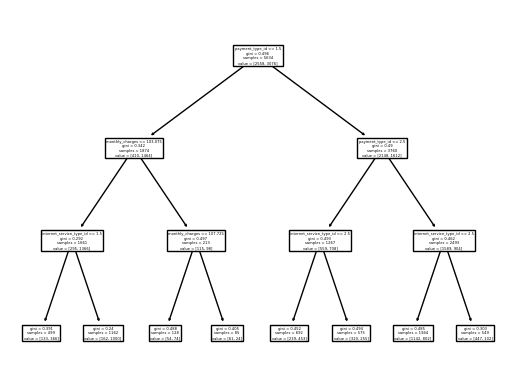

In [37]:
plot_tree(clf, feature_names= X_train.columns.to_list())
plt.show()

In [38]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.
model_1_preds = clf.predict(X_train)


In [39]:
accuracy_score(y_train, model_1_preds)

0.6856585019524317

In [40]:
confusion_matrix(y_train, model_1_preds)

array([[1970,  588],
       [1183, 1893]])

In [41]:
print(classification_report(y_train, model_1_preds))

              precision    recall  f1-score   support

       False       0.62      0.77      0.69      2558
        True       0.76      0.62      0.68      3076

    accuracy                           0.69      5634
   macro avg       0.69      0.69      0.69      5634
weighted avg       0.70      0.69      0.69      5634

